## DAS location map

In [49]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LightSource
import os
from datetime import datetime, timezone
import numpy as np
import seaborn as sns
from pathlib import Path
from tqdm import tqdm
import h5py
import pygmt

# sns.set_theme()

## default value: https://matplotlib.org/stable/tutorials/introductory/customizing.html
params = {
    "font.size": 18,
    "axes.labelsize": 18,
    "axes.titlesize": 18,
    "legend.fontsize": 18,
    "xtick.labelsize": 18,
    "ytick.labelsize": 18,
    "lines.linewidth": 3,
    "lines.markersize": 10,
    'image.origin': "lower",
    "figure.figsize": (4 * 2.5, 3 * 2.5),
    # 'axes.facecolor': 'white',
    # 'axes.edgecolor': 'white',
    # "figure.facecolor": "white",
    # "figure.edgecolor": "white",
    "savefig.bbox": "tight",
    "savefig.dpi": 300,
}
matplotlib.rcParams.update(params)

size = 1.0
alpha = 0.5

In [15]:
# pick_path = Path("../association/")
figure_path = Path('figures')
if not figure_path.exists():
    figure_path.mkdir()

In [8]:
das_mammoth_north = pd.read_csv("/net/kuafu/mnt/tank/data/DASEventData/mammoth_north/das_info.csv")
das_mammoth_south = pd.read_csv("/net/kuafu/mnt/tank/data/DASEventData/mammoth_south/das_info.csv")

lon0 = das_mammoth_south["longitude"].iloc[0]
lat0 = das_mammoth_south["latitude"].iloc[0]

In [9]:
events_mammoth_north = pd.read_csv("/net/kuafu/mnt/tank/data/DASEventData/mammoth_north/catalog_data.csv", index_col="event_id")
events_mammoth_south = pd.read_csv("/net/kuafu/mnt/tank/data/DASEventData/mammoth_south/catalog_data.csv", index_col="event_id")

In [10]:
events_catalog = pd.merge(events_mammoth_north, events_mammoth_south, how="inner", on=["event_id", "event_time", "longitude", "latitude", "depth_km", "magnitude"])

/tmp/ipykernel_915662/1513104945.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.tight_layout()


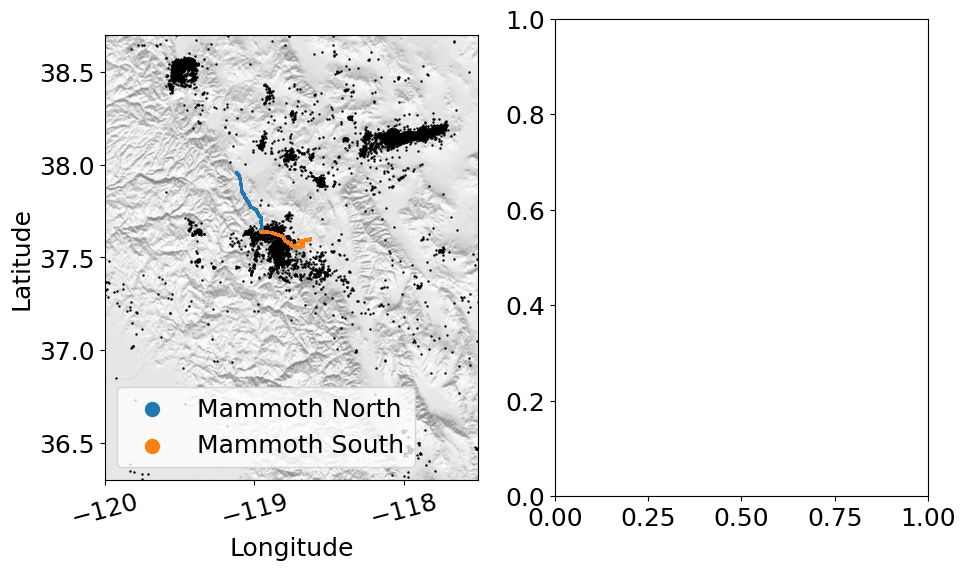

In [16]:
fig, axes = plt.subplots(1, 2, squeeze=False, figsize=(10, 6))

ls = LightSource(azdeg=0, altdeg=45)

# min_longitude = -119
# max_longitude = -116
# min_latitude = 33.6
# max_latitude = 36.5
# region = [min_longitude, max_longitude, min_latitude, max_latitude]
# topo = pygmt.datasets.load_earth_relief(resolution="15s", region=region).to_numpy() / 1e3  # km
# x = np.linspace(min_longitude, max_longitude, topo.shape[1])
# y = np.linspace(min_latitude, max_latitude, topo.shape[0])
# dx, dy = 1, 1
# xgrid, ygrid = np.meshgrid(x, y)
# axes[0,1].pcolormesh(
#     xgrid,
#     ygrid,
#     ls.hillshade(topo, vert_exag=10, dx=dx, dy=dy),
#     vmin=-1,
#     shading="gouraud",
#     cmap="gray",
#     alpha=1.0,
#     antialiased=True,
#     rasterized=True,
# )
# axes[0,1].scatter(events_ridgecrest["longitude"], events_ridgecrest["latitude"], s=3, c="k", linewidth=0, rasterized=True)
# axes[0,1].scatter(
#     events_ridgecrest_south["longitude"], events_ridgecrest_south["latitude"], s=1, c="k", linewidth=0, rasterized=True
# )
# axes[0,1].scatter(das_ridgecrest["longitude"], das_ridgecrest["latitude"], s=1, label="Ridgecrest", rasterized=True)
# axes[0,1].scatter(
#     das_ridgecrest_south["longitude"], das_ridgecrest_south["latitude"], s=1, label="Ridgecrest South", rasterized=True
# )
# # axes[1].axis("scaled")
# axes[0,1].set_aspect(1.0/np.cos(np.deg2rad(min_latitude)))
# axes[0,1].set_xlim([min_longitude, max_longitude])
# axes[0,1].set_ylim([min_latitude, max_latitude])
# axes[0,1].set_xlabel("Longitude")
# axes[0,1].set_ylabel("Latitude")
# axes[0,1].tick_params(axis="x", labelrotation=15)
# axes[0,1].legend(markerscale=10)

min_longitude = -120
max_longitude = -117.5
min_latitude = 36.3
max_latitude = 38.7
region = [min_longitude, max_longitude, min_latitude, max_latitude]
topo = pygmt.datasets.load_earth_relief(resolution="15s", region=region).to_numpy() / 1e3  # km
x = np.linspace(min_longitude, max_longitude, topo.shape[1])
y = np.linspace(min_latitude, max_latitude, topo.shape[0])
dx, dy = 1, 1
xgrid, ygrid = np.meshgrid(x, y)
axes[0,0].pcolormesh(
    xgrid,
    ygrid,
    ls.hillshade(topo, vert_exag=10, dx=dx, dy=dy),
    vmin=-1,
    shading="gouraud",
    cmap="gray",
    alpha=1.0,
    antialiased=True,
    rasterized=True,
)
axes[0,0].scatter(
    events_mammoth_south["longitude"], events_mammoth_south["latitude"], s=3, c="k", linewidth=0, rasterized=True
)
axes[0,0].scatter(
    das_mammoth_north["longitude"], das_mammoth_north["latitude"], s=1, label="Mammoth North", rasterized=True
)
axes[0,0].scatter(
    das_mammoth_south["longitude"], das_mammoth_south["latitude"], s=1, label="Mammoth South", rasterized=True
)
# axes[0].axis("scaled")
axes[0,0].set_aspect(1.0/np.cos(np.deg2rad(min_latitude)))
axes[0,0].set_xlim([min_longitude, max_longitude])
axes[0,0].set_ylim([min_latitude, max_latitude])
axes[0,0].set_xlabel("Longitude")
axes[0,0].set_ylabel("Latitude")
axes[0,0].tick_params(axis="x", labelrotation=15)
axes[0,0].legend(markerscale=10)

fig.tight_layout()
plt.savefig(figure_path / "das_location.png")
plt.savefig(figure_path / "das_location.pdf")
plt.show()

In [ ]:
# waveform_catalog = list(Path("/net/kuafu/mnt/tank/data/DASEventData/catalog/data/").glob("*.h5"))
# waveform_mammoth_south = list(Path("/net/kuafu/mnt/tank/data/DASEventData/mammoth_south/data/").glob("*.h5"))

In [ ]:
# event_ids = set()
# for x in waveform_catalog:
#     event_ids.add(int(x.name.split(".")[0]))
# for x in waveform_mammoth_south:
#     event_ids.add(int(x.name.split(".")[0]))
# event_ids = list(event_ids)

In [ ]:
# events_mammoth_north = events_mammoth_north[events_mammoth_north.index.isin(event_ids)]
# events_mammoth_south = events_mammoth_south[events_mammoth_south.index.isin(event_ids)]

In [17]:
print(f"{len(das_mammoth_north) = }\n{len(das_mammoth_south) = }\n")

len(das_mammoth_north) = 4311
len(das_mammoth_south) = 4670



In [18]:
print(f"{len(events_mammoth_north) = }\n{len(events_mammoth_south) = }\n{len(events_catalog) = }")

len(events_mammoth_north) = 13375
len(events_mammoth_south) = 11241
len(events_catalog) = 9839


In [19]:
picks_path = Path("../association/picks_phasenet_filtered_debug2")


In [20]:
# num_p = 0
# num_s = 0

# for event_id in tqdm(events_catalog.index):

#     if not os.path.exists(picks_path / f"{event_id}.csv"):
#         continue

#     picks = pd.read_csv(picks_path / f"{event_id}.csv")
    
#     num_p += len(picks[picks["phase_type"] == "P"])
#     num_s += len(picks[picks["phase_type"] == "S"])

# print(f"{num_p = }\n{num_s = }")

100%|██████████| 9839/9839 [01:05<00:00, 151.19it/s]


In [22]:
events_das = pd.read_csv("../association/catalog_gamma_debug2.csv", index_col="event_id")
common_ids = set(events_das.index).intersection(set(events_catalog.index))
events_das = events_das.loc[common_ids]
print(f"{len(events_das) = }")

len(events_das) = 9830


/tmp/ipykernel_915662/3128033930.py:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  events_das = events_das.loc[common_ids]


/tmp/ipykernel_915662/979322072.py:101: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.savefig(figure_path / "gamma_catalog_das.pdf")


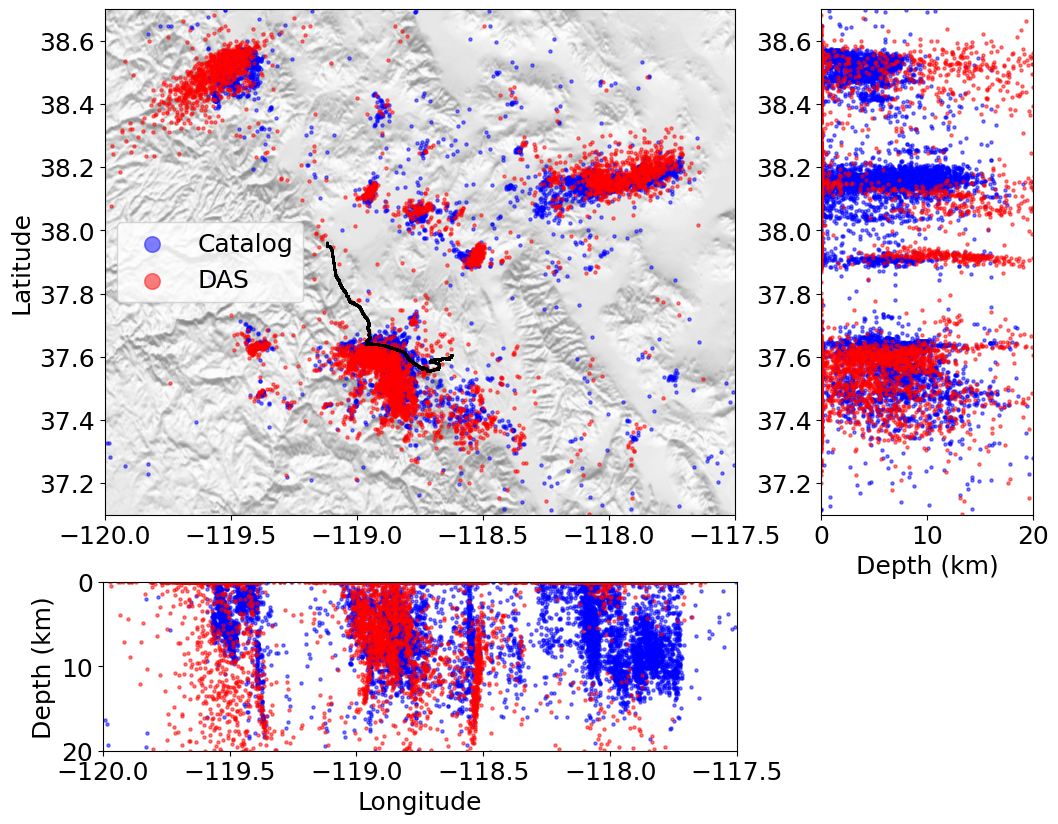

In [28]:
min_longitude = -120
max_longitude = -117.5
min_latitude = 37.1
max_latitude = 38.7
min_depth = -0.1
max_depth = 21
cmap = "viridis"

events_das2 = events_das[(events_das["longitude"]>min_longitude) & (events_das["longitude"]<max_longitude) & (events_das["latitude"]>min_latitude) & (events_das["latitude"]<max_latitude) & (events_das["depth_km"] > min_depth) & (events_das["depth_km"] < max_depth)]
# events_das2 = events_das2.sort_values("gamma_score")
events_catalog2 = events_catalog[(events_catalog["longitude"]>min_longitude) & (events_catalog["longitude"]<max_longitude) & (events_catalog["latitude"]>min_latitude) & (events_catalog["latitude"]<max_latitude) & (events_catalog["depth_km"] > min_depth) & (events_catalog["depth_km"] < max_depth)]

timestamp_das2 = events_das2["time"].apply(lambda x: datetime.fromisoformat(x).replace(tzinfo=timezone.utc).timestamp()).to_numpy()
timestamp_catalog2 = events_catalog2["event_time"].apply(lambda x: datetime.fromisoformat(x).timestamp()).to_numpy()
diff_time2 = timestamp_das2 - timestamp_catalog2[:, np.newaxis]
recall_idx2 = (np.abs(diff_time2) < 5).any(axis=0)
events_das2 = events_das2[recall_idx2]

fig, axes = plt.subplots(2, 2, figsize=(12, 12 * (max_latitude-min_latitude)/((max_longitude-min_longitude)*np.cos(np.deg2rad(min_latitude)))), gridspec_kw={'width_ratios': [3, 1], 'height_ratios': [3, 1]})

region = [min_longitude, max_longitude, min_latitude, max_latitude]
topo = pygmt.datasets.load_earth_relief(resolution="15s", region=region).to_numpy() / 1e3  # km
x = np.linspace(min_longitude, max_longitude, topo.shape[1])
y = np.linspace(min_latitude, max_latitude, topo.shape[0])
dx, dy = 1, 1
xgrid, ygrid = np.meshgrid(x, y)
axes[0,0].pcolormesh(
    xgrid,
    ygrid,
    ls.hillshade(topo, vert_exag=10, dx=dx, dy=dy),
    vmin=-1,
    shading="gouraud",
    cmap="gray",
    alpha=1.0,
    antialiased=True,
    rasterized=True,
)

axes[0,0].scatter(
    events_catalog2["longitude"],
    events_catalog2["latitude"],
    s=5,
    c="blue",
    alpha=0.5,
    label="Catalog",
    rasterized=True,
)
axes[0,0].scatter(events_das2["longitude"], events_das2["latitude"], s=5, c="r", alpha=0.5, label="DAS", rasterized=True)
axes[0,0].autoscale(tight=True)
xlim = axes[0,0].get_xlim()
ylim = axes[0,0].get_ylim()
# zlim = (0, 21)
# axes[0,0].set_title(f"Number of events: {len(events_das2)}")
axes[0, 0].scatter(das_mammoth_north["longitude"], das_mammoth_north["latitude"], s=2, c="k", marker=".", alpha=0.5, rasterized=True)
axes[0, 0].scatter(das_mammoth_south["longitude"], das_mammoth_south["latitude"], s=2, c="k", marker=".", alpha=0.5, rasterized=True)
# axes[0, 0].axis("scaled")
axes[0, 0].set_aspect(1.0/np.cos(np.deg2rad(min_latitude)))
axes[0,0].set_xlim(xlim)
axes[0,0].set_ylim(ylim)
axes[0, 0].legend(markerscale=5)
axes[0,0].set_ylabel("Latitude")

axes[0,1].scatter(
    events_catalog2["depth_km"],
    events_catalog2["latitude"],
    s=5,
    c="blue",
    alpha=0.5,
    label="Catalog",
    rasterized=True,
)
axes[0,1].scatter(events_das2["depth_km"], events_das2["latitude"],  s=5, c="r", alpha=0.5, rasterized=True)
axes[0,1].autoscale(tight=True)
axes[0,1].set_ylim(ylim)
axes[0,1].set_xlim([0, 20])
axes[0,1].set_xlabel("Depth (km)")

axes[1, 0].scatter(
    events_catalog2["longitude"],
    events_catalog2["depth_km"],
    s=5,
    c="blue",
    alpha=0.5,
    label="Catalog",
    rasterized=True,
)
axes[1,0].scatter(events_das2["longitude"], events_das2["depth_km"], s=5, c="r", alpha=0.5, rasterized=True)
axes[1,0].autoscale(tight=True)    
axes[1,0].set_xlim(xlim)
axes[1,0].set_ylim([0, 20])
axes[1,0].invert_yaxis()
axes[1,0].set_ylabel("Depth (km)")
axes[1,0].set_xlabel("Longitude")

axes[1, 1].axis('off')
# axes[1, 1].set_xlim([0,20])
# axes[1, 1].set_ylim([0,20])
# axes[1, 1].invert_yaxis()

# fig.tight_layout()
fig.savefig(figure_path / "gamma_catalog_das.pdf")
fig.savefig(figure_path / "gamma_catalog_das.png")

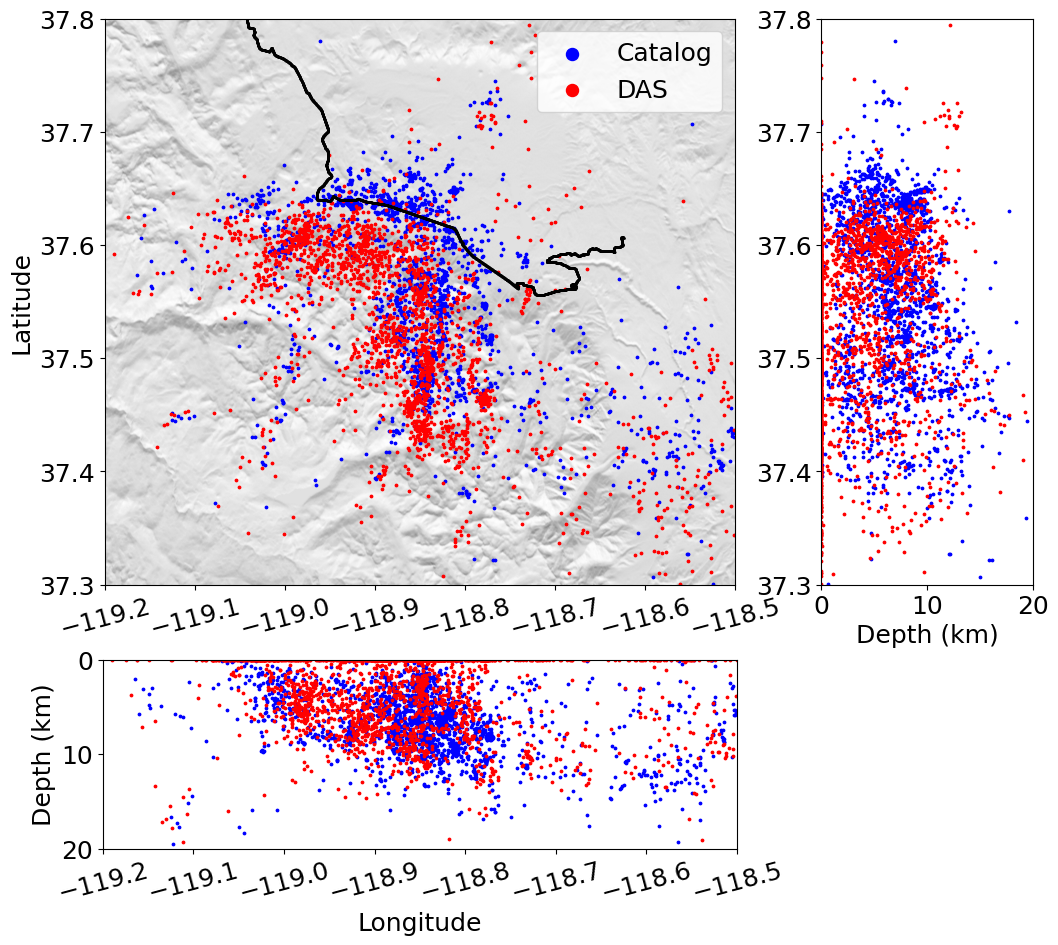

In [35]:
min_longitude = -119.2
max_longitude = -118.5
min_latitude = 37.3
max_latitude = 37.8
min_depth = -0.1
max_depth = 21
cmap = "viridis"

events_das2 = events_das[(events_das["longitude"]>min_longitude) & (events_das["longitude"]<max_longitude) & (events_das["latitude"]>min_latitude) & (events_das["latitude"]<max_latitude) & (events_das["depth_km"] > min_depth) & (events_das["depth_km"] < max_depth)]
# events_das2 = events_das2.sort_values("gamma_score")
events_catalog2 = events_catalog[(events_catalog["longitude"]>min_longitude) & (events_catalog["longitude"]<max_longitude) & (events_catalog["latitude"]>min_latitude) & (events_catalog["latitude"]<max_latitude) & (events_catalog["depth_km"] > min_depth) & (events_catalog["depth_km"] < max_depth)]

timestamp_das2 = events_das2["time"].apply(lambda x: datetime.fromisoformat(x).replace(tzinfo=timezone.utc).timestamp()).to_numpy()
timestamp_catalog2 = events_catalog2["event_time"].apply(lambda x: datetime.fromisoformat(x).timestamp()).to_numpy()
diff_time2 = timestamp_das2 - timestamp_catalog2[:, np.newaxis]
recall_idx2 = (np.abs(diff_time2) < 3).any(axis=0)
events_das2 = events_das2[recall_idx2]

fig, axes = plt.subplots(2, 2, figsize=(12, 12 * (max_latitude-min_latitude)/((max_longitude-min_longitude)*np.cos(np.deg2rad(min_latitude)))), gridspec_kw={'width_ratios': [3, 1], 'height_ratios': [3, 1]})

region = [min_longitude, max_longitude, min_latitude, max_latitude]
topo = pygmt.datasets.load_earth_relief(resolution="03s", region=region).to_numpy() / 1e3  # km
x = np.linspace(min_longitude, max_longitude, topo.shape[1])
y = np.linspace(min_latitude, max_latitude, topo.shape[0])
dx, dy = 1, 1
xgrid, ygrid = np.meshgrid(x, y)
axes[0,0].pcolormesh(
    xgrid,
    ygrid,
    ls.hillshade(topo, vert_exag=10, dx=dx, dy=dy),
    vmin=-1,
    shading="gouraud",
    cmap="gray",
    alpha=1.0,
    antialiased=True,
    rasterized=True,
)

axes[0,0].scatter(
    events_catalog2["longitude"],
    events_catalog2["latitude"],
    s=3,
    c="blue",
    alpha=1.0,
    label="Catalog",
    rasterized=True,
)
axes[0,0].scatter(events_das2["longitude"], events_das2["latitude"], s=3, c="r", alpha=1.0, label="DAS", rasterized=True)
axes[0,0].autoscale(tight=True)
xlim = axes[0,0].get_xlim()
ylim = axes[0,0].get_ylim()
# zlim = (0, 21)
# axes[0,0].set_title(f"Number of events: {len(events_das2)}")
axes[0, 0].scatter(das_mammoth_north["longitude"], das_mammoth_north["latitude"], s=2, c="k", marker=".", alpha=0.5, rasterized=True)
axes[0, 0].scatter(das_mammoth_south["longitude"], das_mammoth_south["latitude"], s=2, c="k", marker=".", alpha=0.5, rasterized=True)
# axes[0, 0].axis("scaled")
axes[0, 0].set_aspect(1.0/np.cos(np.deg2rad(min_latitude)))
axes[0,0].set_xlim(xlim)
axes[0,0].set_ylim(ylim)
axes[0, 0].legend(markerscale=5)
axes[0, 0].tick_params(axis="x", labelrotation=15)
axes[0,0].set_ylabel("Latitude")

axes[0,1].scatter(
    events_catalog2["depth_km"],
    events_catalog2["latitude"],
    s=3,
    c="blue",
    alpha=1.0,
    label="Catalog",
    rasterized=True,
)
axes[0,1].scatter(events_das2["depth_km"], events_das2["latitude"],  s=3, c="r", alpha=1.0, rasterized=True)
axes[0,1].autoscale(tight=True)
axes[0,1].set_ylim(ylim)
axes[0,1].set_xlim([0, 20])
axes[0,1].set_xlabel("Depth (km)")

axes[1, 0].scatter(
    events_catalog2["longitude"],
    events_catalog2["depth_km"],
    s=3,
    c="blue",
    alpha=1.0,
    label="Catalog",
    rasterized=True,
)
axes[1,0].scatter(events_das2["longitude"], events_das2["depth_km"], s=3, c="r", alpha=1.0, rasterized=True)
axes[1,0].autoscale(tight=True)    
axes[1,0].set_xlim(xlim)
axes[1,0].set_ylim([0, 20])
axes[1,0].invert_yaxis()
axes[1,0].set_ylabel("Depth (km)")
axes[1,0].tick_params(axis="x", labelrotation=15)
axes[1,0].set_xlabel("Longitude")

axes[1, 1].axis('off')
# axes[1, 1].set_xlim([0,20])
# axes[1, 1].set_ylim([0,20])
# axes[1, 1].invert_yaxis()

# fig.tight_layout()
fig.savefig(figure_path / "gamma_catalog_das2.pdf")
fig.savefig(figure_path / "gamma_catalog_das2.png")

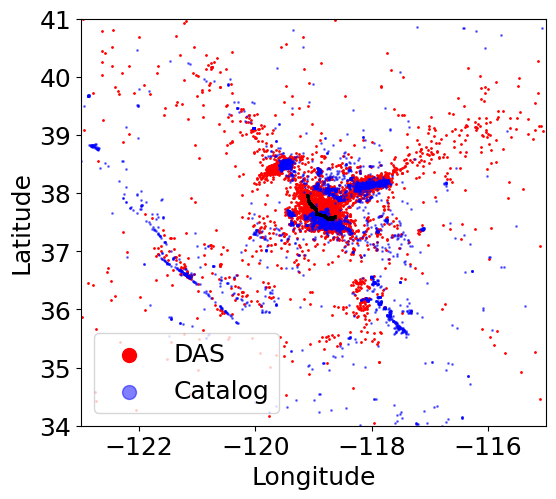

In [30]:
plt.figure(figsize=(6, 10))
plt.scatter(events_das["longitude"], events_das["latitude"], s=1, c="red", label="DAS", rasterized=True)
plt.scatter(events_catalog["longitude"], events_catalog["latitude"], s=1, c="blue", alpha=0.5, label="Catalog", rasterized=True)
# plt.scatter(events_das["longitude"], events_das["latitude"], s=1, label="DAS", rasterized=True)
# plt.scatter(events_catalog["longitude"], events_catalog["latitude"], s=1, alpha=0.5, label="Catalog", rasterized=True)
plt.scatter(das_mammoth_north["longitude"], das_mammoth_north["latitude"], s=1, c="black", alpha=0.5, rasterized=True)
plt.scatter(das_mammoth_south["longitude"], das_mammoth_south["latitude"], s=1, c="black", alpha=0.5, rasterized=True)
plt.legend(markerscale=10)
plt.axis("scaled")
plt.xlim([-123, -115])
plt.ylim([34, 41])
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.savefig(os.path.join(figure_path, "earthquake_location_mapview_mammoth_large.png"), dpi=300, bbox_inches="tight")
plt.savefig(os.path.join(figure_path, "earthquake_location_mapview_mammoth_large.pdf"), dpi=300, bbox_inches="tight")
plt.show()

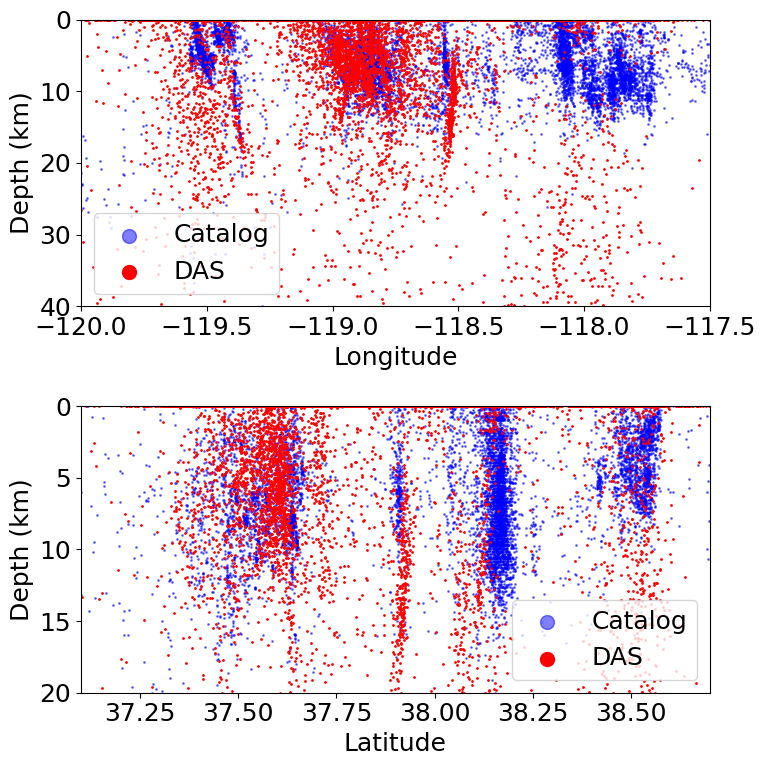

In [36]:
fig, axes = plt.subplots(2, 1, figsize=(8, 8))
axes[0].scatter(events_catalog["longitude"], events_catalog["depth_km"], s=1, c="blue", alpha=0.5, label="Catalog", rasterized=True)
axes[0].scatter(events_das["longitude"], events_das["depth_km"], s=1, c="red", label="DAS", rasterized=True)
axes[0].set_xlim([-120, -117.5])
axes[0].set_ylim([0, 40])
axes[0].set_xlabel("Longitude")
axes[0].set_ylabel("Depth (km)")
axes[0].invert_yaxis()
axes[0].legend(markerscale=10)


axes[1].scatter(events_catalog["latitude"], events_catalog["depth_km"], s=1, c="blue", alpha=0.5, label="Catalog", rasterized=True)
axes[1].scatter(events_das["latitude"], events_das["depth_km"], s=1, c="red", label="DAS", rasterized=True)
axes[1].set_xlim([37.1, 38.7])
axes[1].set_ylim([0, 20])
axes[1].set_xlabel("Latitude")
axes[1].set_ylabel("Depth (km)")
axes[1].invert_yaxis()
axes[1].legend(markerscale=10)

fig.tight_layout()
plt.savefig(os.path.join(figure_path, "earthquake_location_depth_mammoth.png"), dpi=300, bbox_inches="tight")
plt.savefig(os.path.join(figure_path, "earthquake_location_depth_mammoth.pdf"), dpi=300, bbox_inches="tight")
plt.show()

In [37]:
timestamp_das = events_das["time"].apply(lambda x: datetime.fromisoformat(x).replace(tzinfo=timezone.utc).timestamp()).to_numpy()
timestamp_catalog = events_catalog["event_time"].apply(lambda x: datetime.fromisoformat(x).timestamp()).to_numpy()
diff_time = timestamp_das - timestamp_catalog[:, np.newaxis]
degree2km = 111.3
diff_lat = (events_das["latitude"].to_numpy() - events_catalog["latitude"].to_numpy()[:, np.newaxis]) * degree2km
diff_lon = (events_das["longitude"].to_numpy() - events_catalog["longitude"].to_numpy()[:, np.newaxis]) * np.cos(np.deg2rad(lat0)) * degree2km
diff_dep = events_das["depth_km"].to_numpy() - events_catalog["depth_km"].to_numpy()[:, np.newaxis]

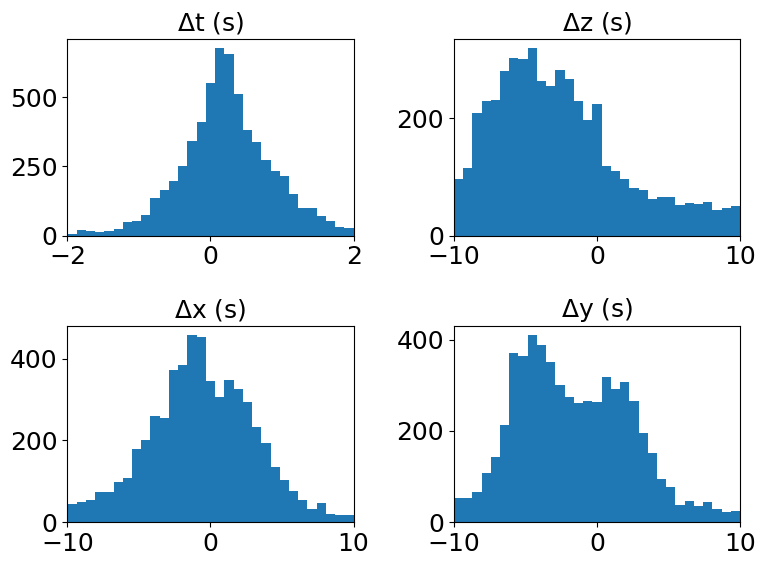

In [38]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
axes[0, 0].hist(diff_time[np.abs(diff_time) < 5], range=[-2, 2], bins=31)#, facecolor="b", edgecolor="k", alpha=0.8)
axes[0, 0].autoscale(enable=True, axis="x", tight=True)
axes[0, 0].set_title(r"$\Delta$t (s)")
axes[0, 1].hist(diff_dep[np.abs(diff_time) < 5], range=[-10, 10], bins=31)#, facecolor="b", edgecolor="k", alpha=0.8)
axes[0, 1].autoscale(enable=True, axis="x", tight=True)
axes[0, 1].set_title(r"$\Delta$z (s)")
axes[1, 0].hist(diff_lon[np.abs(diff_time) < 5], range=[-10, 10], bins=31)#, facecolor="b", edgecolor="k", alpha=0.8)
axes[1, 0].autoscale(enable=True, axis="x", tight=True)
axes[1, 0].set_title(r"$\Delta$x (s)")
axes[1, 1].hist(diff_lat[np.abs(diff_time) < 5], range=[-10, 10], bins=31)#, facecolor="b", edgecolor="k", alpha=0.8)
axes[1, 1].autoscale(enable=True, axis="x", tight=True)
axes[1, 1].set_title(r"$\Delta$y (s)")
fig.tight_layout()
plt.savefig(os.path.join(figure_path, "location_error_mammoth.png"), dpi=300, bbox_inches="tight")
plt.savefig(os.path.join(figure_path, "location_error_mammoth.pdf"), dpi=300, bbox_inches="tight")
plt.show()

In [39]:

events_das["dist_km"] = events_das.apply(lambda x: np.sqrt(((x["longitude"] - lon0)*np.cos(np.deg2rad(lat0))) ** 2 + (x["latitude"] - lat0) ** 2)*degree2km, axis=1)
events_catalog["dist_km"] = events_catalog.apply(lambda x: np.sqrt(((x["longitude"] - lon0)*np.cos(np.deg2rad(lat0))) ** 2 + (x["latitude"] - lat0) ** 2)*degree2km, axis=1)

events_das = events_das.loc[events_das["dist_km"] < 3*degree2km]
events_catalog = events_catalog.loc[events_catalog["dist_km"] < 3*degree2km]
timestamp_das = events_das["time"].apply(lambda x: datetime.fromisoformat(x).replace(tzinfo=timezone.utc).timestamp()).to_numpy()
timestamp_catalog = events_catalog["event_time"].apply(lambda x: datetime.fromisoformat(x).timestamp()).to_numpy()
diff_time = timestamp_das - timestamp_catalog[:, np.newaxis]
recall_idx = (np.abs(diff_time) < 10).any(axis=1)

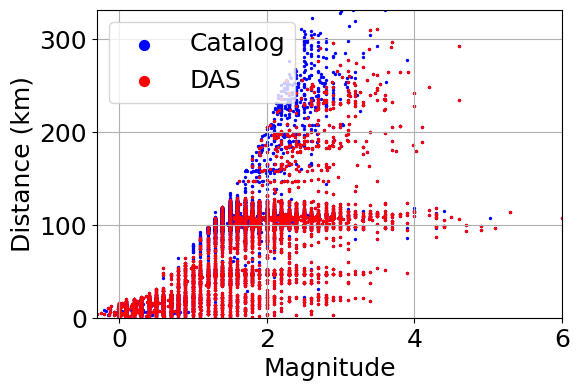

In [47]:

plt.figure(figsize=(6, 4))
# plt.scatter(events_mammoth_north["magnitude"], events_mammoth_north["dist_km"], s=3, label="Catalog", rasterized=True)
# plt.scatter(events_mammoth_north[recall_idx]["magnitude"], events_mammoth_north[recall_idx]["dist_km"], s=3, label="DAS", rasterized=True)
plt.scatter(events_catalog["magnitude"], events_catalog["dist_km"], s=2, c="b", label="Catalog", rasterized=True)
plt.scatter(events_catalog[recall_idx]["magnitude"], events_catalog[recall_idx]["dist_km"], s=2, c="r", label="DAS", rasterized=True)
plt.autoscale(enable=True, axis="both", tight=True)
plt.xlabel("Magnitude")
plt.ylabel("Distance (km)")
plt.grid("on")
plt.legend(markerscale=5, loc="upper left")
plt.ylim(bottom=0)
plt.savefig(os.path.join(figure_path, "earthquake_recall_mammoth.png"), dpi=300, bbox_inches="tight")
plt.savefig(os.path.join(figure_path, "earthquake_recall_mammoth.pdf"), dpi=300, bbox_inches="tight")
plt.show()

In [41]:
precisions = []
recalls = []
dts = []
for dt in range(1, 16, 1):
    precision = np.sum((np.abs(diff_time) < dt).any(axis=1)) / len(events_das)
    recall = np.sum((np.abs(diff_time) < dt).any(axis=0)) / len(events_catalog)
    print(f"{dt}: {precision = :.3f} {recall = :.3f}")

    precisions.append(precision)
    recalls.append(recall)
    dts.append(dt)

1: precision = 0.505 recall = 0.548
2: precision = 0.581 recall = 0.636
3: precision = 0.593 recall = 0.652
4: precision = 0.600 recall = 0.663
5: precision = 0.606 recall = 0.673
6: precision = 0.610 recall = 0.681
7: precision = 0.615 recall = 0.689
8: precision = 0.620 recall = 0.698
9: precision = 0.623 recall = 0.704
10: precision = 0.628 recall = 0.712
11: precision = 0.632 recall = 0.719
12: precision = 0.634 recall = 0.726
13: precision = 0.638 recall = 0.735
14: precision = 0.642 recall = 0.742
15: precision = 0.645 recall = 0.749


In [43]:
print(f"{precision = :.3f} {recall = :.3f}")

precision = 0.645 recall = 0.749


0it [00:00, ?it/s]

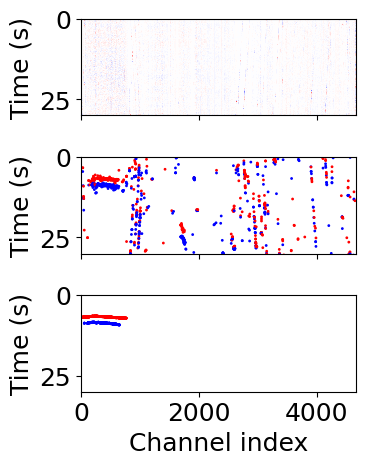

1it [00:21, 21.31s/it]

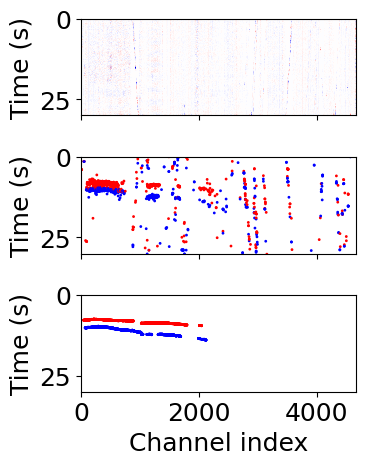

2it [00:47, 24.33s/it]

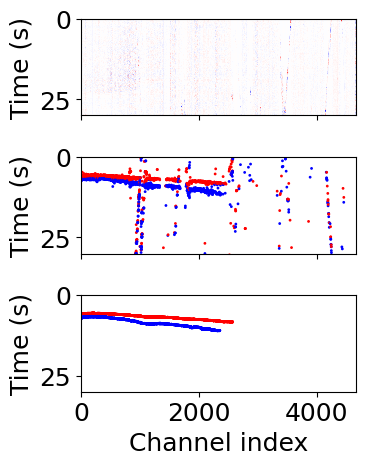

3it [01:10, 23.79s/it]

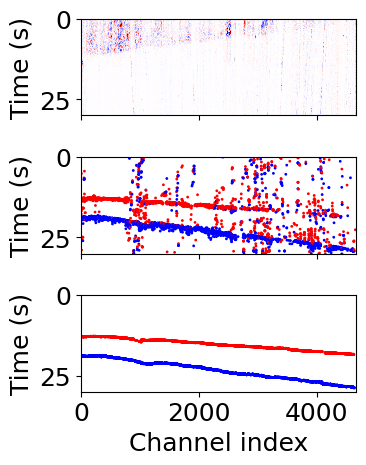

4it [01:31, 22.93s/it]


In [50]:
selected_event_ids = [
    "73473316",
    "73473331",
    "73473381",
    "73474001"
    # "71114014",
    # "71118574",
    # "71118679",
    # "71121589",
    # "71121689",
    # "71123139",
    # "71123184",
    # "73475186",
    # "73484126",
    # "73484266",
    # "73484351",
    # "73484856",
    # "73484861",
]

# sns.reset_orig()
# sns.set_theme()

sampling_rate = 100
dt = 1.0 / sampling_rate
for i, event_id in tqdm(enumerate(selected_event_ids)):
    # for i, event_id in tqdm(enumerate(events_mammoth_north.index)):

    raw_picks = pd.read_csv(f"/net/kuafu/mnt/tank/data/EventData/Mammoth_north/picks_phasenet_raw/{event_id}.csv")
    raw_picks["channel_index"] = raw_picks["station_id"]
    raw_picks["color"] = raw_picks["phase_type"].apply(lambda x: "r" if x == "p" else "b")

    try:
        das_picks = pd.read_csv(f"/net/kuafu/mnt/tank/data/EventData/Mammoth_north/picks_phasenet_das/{event_id}.csv")
    except:
        continue
    das_picks["color"] = das_picks["phase_type"].apply(lambda x: "r" if x == "P" else "b")

    t0 = 25
    tn = 55
    with h5py.File(f"/net/kuafu/mnt/tank/data/EventData/Mammoth_north/data/{event_id}.h5", "r") as f:
        waveform = f["data"][t0 * sampling_rate : tn * sampling_rate, :]
    nt, nx = waveform.shape

    # fig, axes = plt.subplots(3, 1, figsize=(8, 9), sharex=True)
    fig, axes = plt.subplots(3, 1, figsize=(4, 5), sharex=True)

    waveform -= np.median(waveform, axis=1, keepdims=True)
    waveform -= np.median(waveform, axis=0, keepdims=True)
    waveform /= np.std(waveform, axis=0, keepdims=True)
    vmax = np.std(waveform)
    axes[0].imshow(
        waveform, vmax=vmax * 0.6, vmin=-vmax * 0.6, aspect="auto", cmap="seismic", extent=([0, nx, tn - t0, 0])
    )
    axes[0].grid(False)
    axes[0].set_ylabel("Time (s)")

    axes[1].scatter(
        raw_picks["channel_index"],
        raw_picks["phase_index"] * dt - t0,
        s=1,
        c=raw_picks["color"],
        label="Raw Picks",
        linewidth=1,
        rasterized=True,
    )
    axes[1].set_xlim([0, nx])
    axes[1].set_ylim([0, tn - t0])
    axes[1].invert_yaxis()
    # axes[1].set_xlabel("Channel index")
    axes[1].set_ylabel("Time (s)")

    axes[2].scatter(
        das_picks["channel_index"],
        das_picks["phase_index"] * dt - t0,
        s=1,
        c=das_picks["color"],
        label="Raw",
        linewidth=1,
        rasterized=True,
    )
    axes[2].set_xlim([0, nx])
    axes[2].set_ylim([0, tn - t0])
    axes[2].invert_yaxis()
    # axes[2].set_xlabel("Channel index")
    axes[2].set_ylabel("Time (s)")
    axes[2].set_xlabel("Channel index")

    fig.tight_layout()
    try:
        plt.savefig(os.path.join(figure_path, f"examples/{event_id}.png"), dpi=300, bbox_inches="tight")
    except:
        os.mkdir(os.path.join(figure_path, f"examples"))
        plt.savefig(os.path.join(figure_path, f"examples/{event_id}.png"), dpi=300, bbox_inches="tight")

    plt.show()
    if i > 100:
        break
    # break